# Проект: Анализ привычек студентов и их академической успеваемости

## 1. Описание проекта
**Цель:** Исследовать влияние привычек и образа жизни студентов на их академическую успеваемость.  
**Датасет:** [Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset)  
**Задачи:**
- Провести разведочный анализ данных (EDA).
- Выявить ключевые факторы, влияющие на успеваемость.
- Построить модели для прогнозирования успеваемости.
- Сравнить построенные модели и выбрать лучшую

## 2. Описание данных
Датасет содержит информацию о студентах:
- Демографические данные (возраст, пол).
- Привычки (сон, питание, физическая активность).
- Учебные привычки (время учебы, использование технологий).
- Психологические факторы (стресс, мотивация).
- Академическая успеваемость (оценки, GPA).
## 3. Модели
- Линейная регрессия
- Random Forest
- kNN
## 4. Оценка моделей
- Сравнение по метрикам

In [62]:
#Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error)

## 1. Разведочный анализ(EDA)

### 1.1 Загрузка данных

In [15]:
students = pd.read_csv("enhanced_student_habits_performance_dataset.csv")

#Первые 5 строк данных
display(students.head())

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


В датасете всего **31 признак**:
- *student_id* - yникальный идентификатор студента
- age - возраст(16-28)
- gender - пол(мужской, женский и другие)
- major - область изучения(например, компьютерные науки, искусство)
- study_hours_per_day - ежедневное среднее время учёбы 
- social_media_hours - время в соц. сетях
- netflix_hours - время в нетфликс
- part_time_job - есть ли работа(Да/Нет)
- attendance_percentage - академическая посещаемость в процентах
- sleep_hours - продолжительность сна
- diet_quality - качество питания
- exercise_frequency - частота физических упражнений
- parental_education_level - уровень образования родителей
- internet_quality - качество интернета
- mental_health_rating - оценка психического здоровья
- extracurricular_participation - внеклассное участие
- **previous_gpa** - предыдущий средний балл
- semester - семестр
- stress_level - уровень стресса
- dropout_risk - риск отчисления(зависит от уровня мотивации и стресса)(Да/Нет)
- social_activity - соц. активность
- screen_time - время на экране
- study_environment - обычное место учёбы
- access_to_tutoring - доступ к обучению
- family_income_range - диапазон доходов семьи
- parental_support_level - уровень родительской поддержки
- motivation_level - уровень мотивации
- exam_anxiety_score - тревожность на экзаменах
- learning_style - предпочтительный метод обучения
- time_management_score - оценка по тайм-менеджменту
- **exam_score** - оценка за экзамен

### 1.2 Проверка качества данных

In [19]:
missing_data = students.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(students)) * 100
display(missing_data)

,Пропущенные значения,% от общего
student_id,0,0.0
age,0,0.0
gender,0,0.0
major,0,0.0
study_hours_per_day,0,0.0
social_media_hours,0,0.0
netflix_hours,0,0.0
part_time_job,0,0.0
attendance_percentage,0,0.0
sleep_hours,0,0.0


Нам повезло и пропущенных значений в данных **не оказалось**

### 1.3 Отбор числовых ключевых признаков

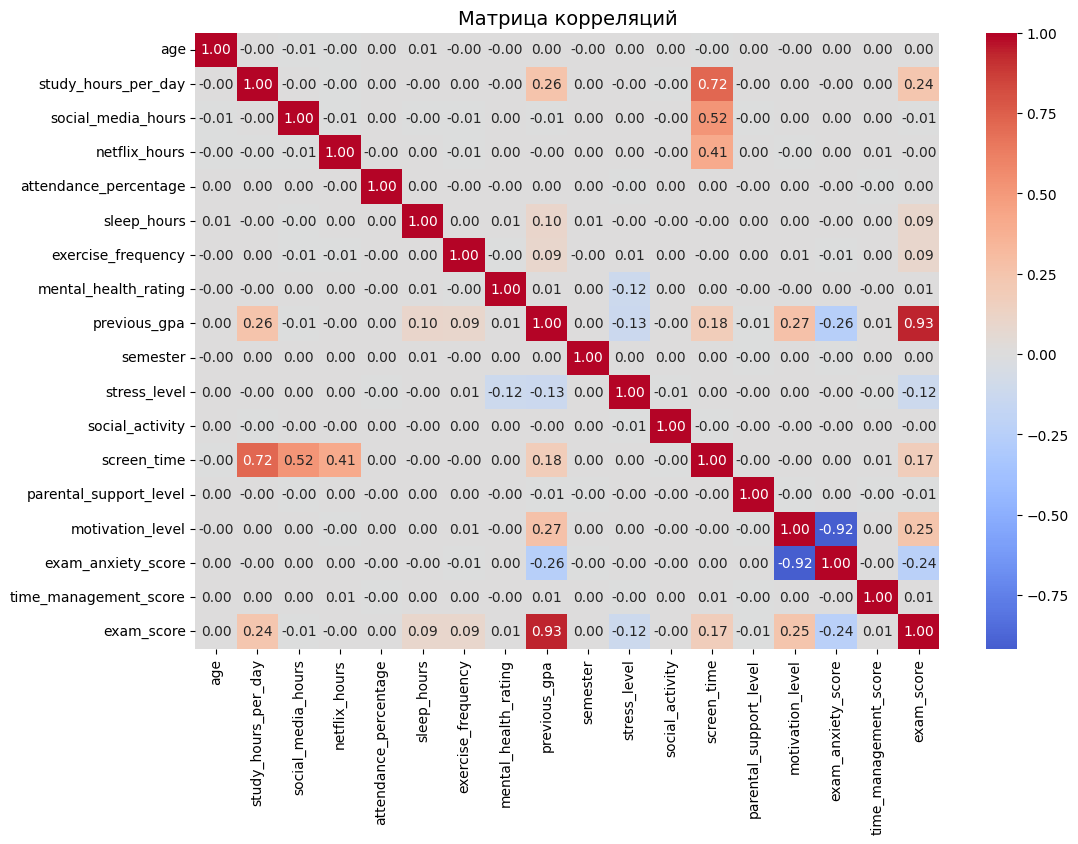

Корреляции признаков с целевой переменной:


,Feature,Corr_prev_gpa
0,previous_gpa,1.000000
1,exam_score,0.932940
2,motivation_level,0.270758
3,study_hours_per_day,0.257445
4,exam_anxiety_score,0.255692
5,screen_time,0.180460
6,stress_level,0.127729
7,sleep_hours,0.097282
8,exercise_frequency,0.092738
9,mental_health_rating,0.011431


C:\Users\User\AppData\Local\Temp\ipykernel_6352\735926995.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Corr_prev_gpa', y='Feature', data=corr_combined.head(10), palette='viridis')


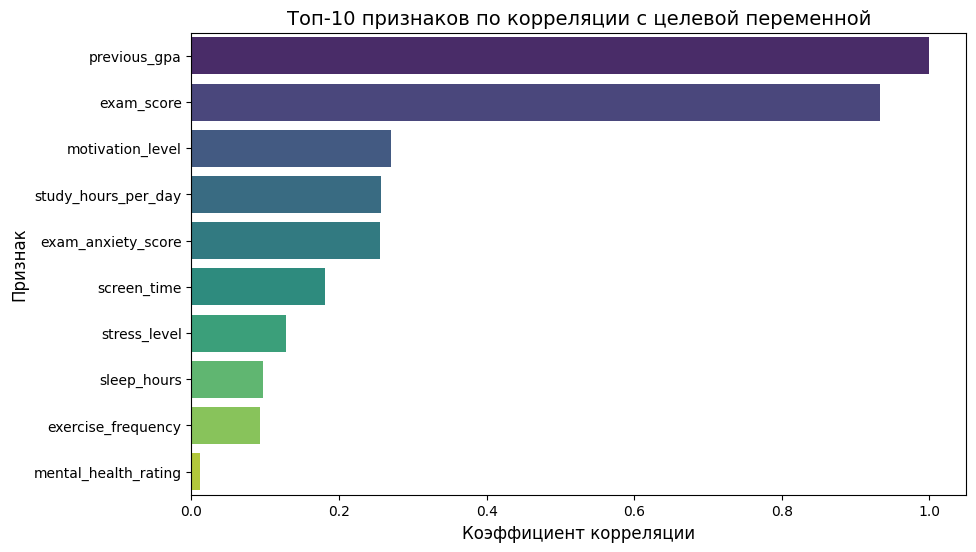

In [21]:
# Выделяем только числовые признаки
numeric_cols = students.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols.remove('student_id')
numeric_students = students[numeric_cols]

# 1. Матрица корреляций
plt.figure(figsize=(12, 8))
corr_matrix = numeric_students.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Матрица корреляций", fontsize=14)
plt.show()

# Корреляции с previous_gpa
corr_prev_gpa = numeric_students.corr()['previous_gpa'].abs().sort_values(ascending=False)

# Объединение результатов
corr_combined = pd.DataFrame({
    'Feature': corr_prev_gpa.index,
    'Corr_prev_gpa': corr_prev_gpa.values,
})

print("Корреляции признаков с целевой переменной:")
display(corr_combined.head(10))

# Топ-10 признаков по корреляции
top_features = corr_combined.head(10)['Feature'].tolist()

# Убираем сами целевые переменные, если они попали в список
top_features = [f for f in top_features if f not in ['previous_gpa']]

# График корреляций
plt.figure(figsize=(10, 6))
sns.barplot(x='Corr_prev_gpa', y='Feature', data=corr_combined.head(10), palette='viridis')
plt.title("Топ-10 признаков по корреляции с целевой переменной", fontsize=14)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признак", fontsize=12)
plt.show()

Отсюда видим, что наиболее лучшими числовыми ключевыми признаками будут:
- уровень мотивации
- количество часов на учёбу в день
- тревожность на экзамене
- экранное время
- уровень стресса
- продолжительность сна
- частота физических упражнений

### 1.4 Отбор ключевых категориальных признаков

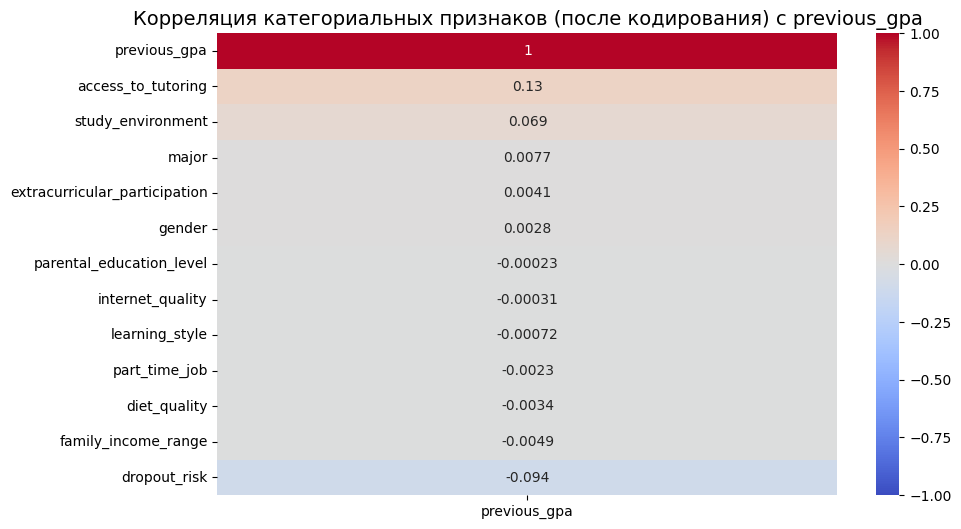

In [23]:
# Выделяем категориальные признаки
cat_cols = students.select_dtypes(include=['object']).columns
cat_students = students[cat_cols]

# Пример: корреляция между закодированными категориями и exam_score
encoded_students = students[cat_cols].apply(LabelEncoder().fit_transform)
encoded_students['previous_gpa'] = students['previous_gpa']
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_students.corr()[['previous_gpa']].sort_values('previous_gpa', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция категориальных признаков (после кодирования) с previous_gpa', fontsize=14)
plt.show()

Отсюда видим, что наиболее лучшими категориальными ключевыми признаками будут:
- доступ к обучению
- обычное место обучения
- риск отчисления

### 1.5 Визуализация распределений

#### 1.5.1 Ключевые признаки

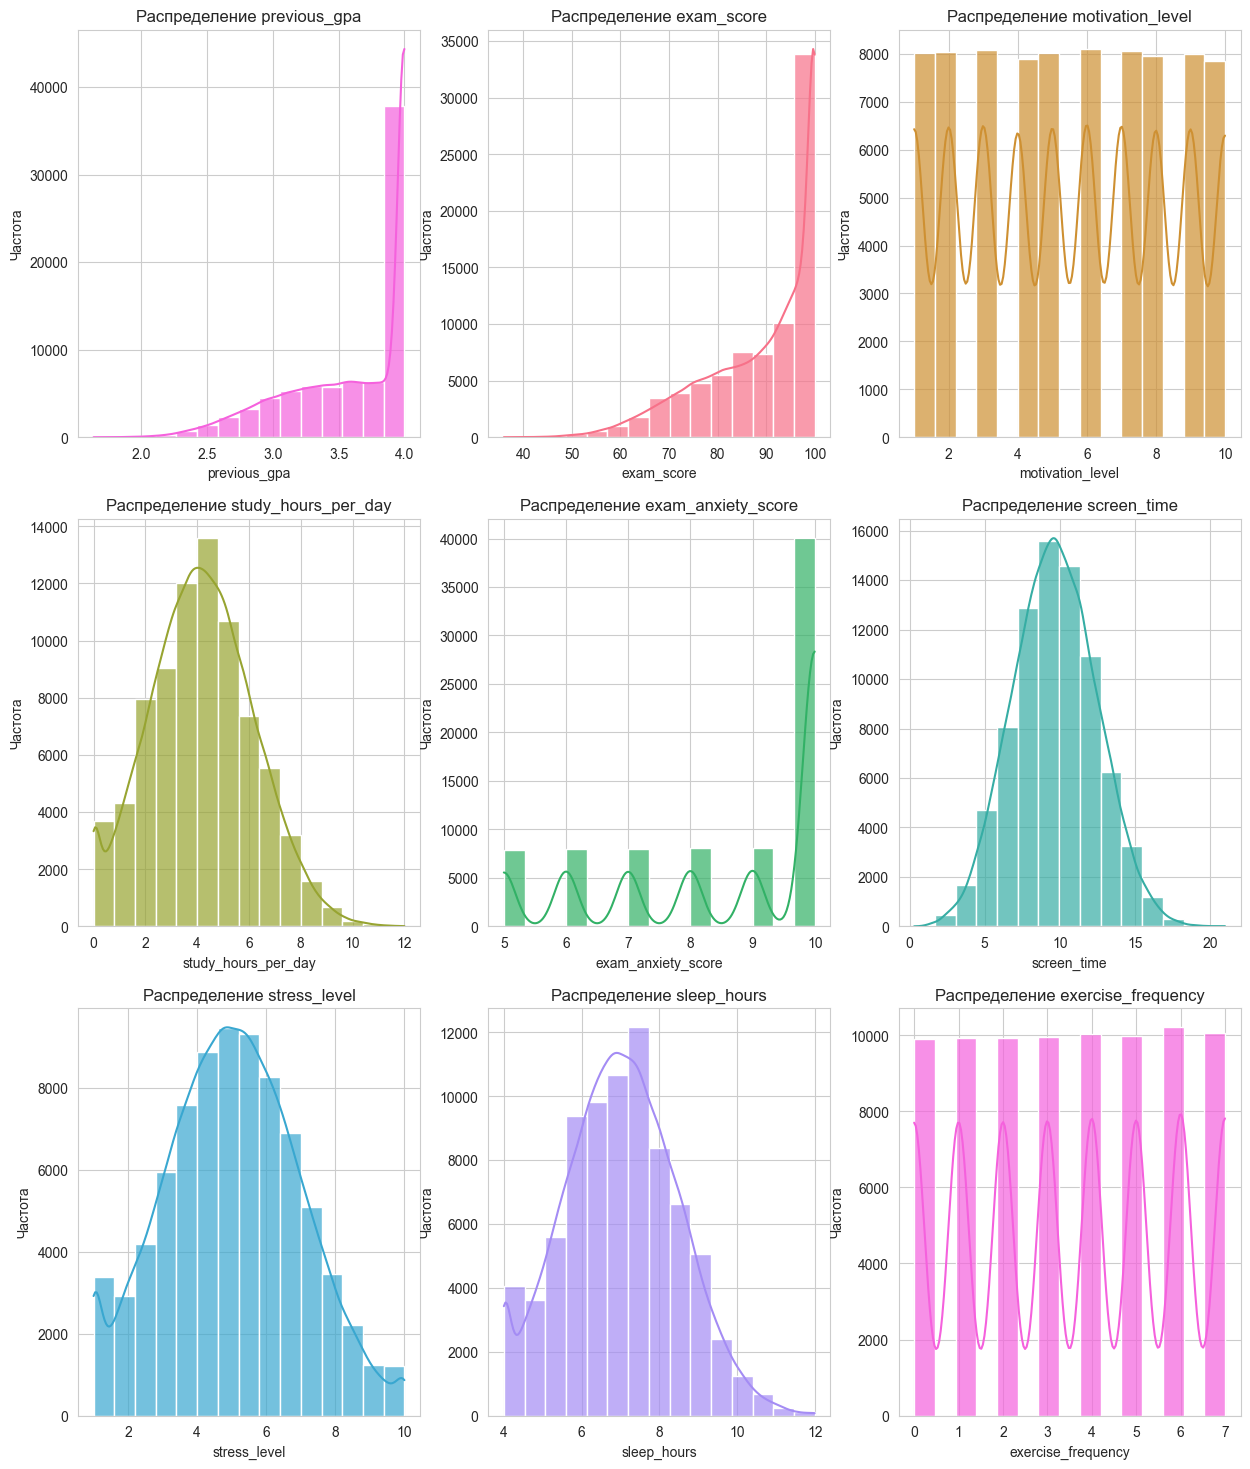

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 18))
palette = sns.color_palette("husl", 8)
numeric_cols = ['previous_gpa', 'exam_score', 'motivation_level','study_hours_per_day','exam_anxiety_score',
                'screen_time', 'stress_level', 'sleep_hours', 'exercise_frequency']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(students[col], kde=True, color=palette[i-2], bins=15, alpha=0.7)
    plt.title(f'Распределение {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Частота', fontsize=10)

#### 1.5.2 Категориальные признаки

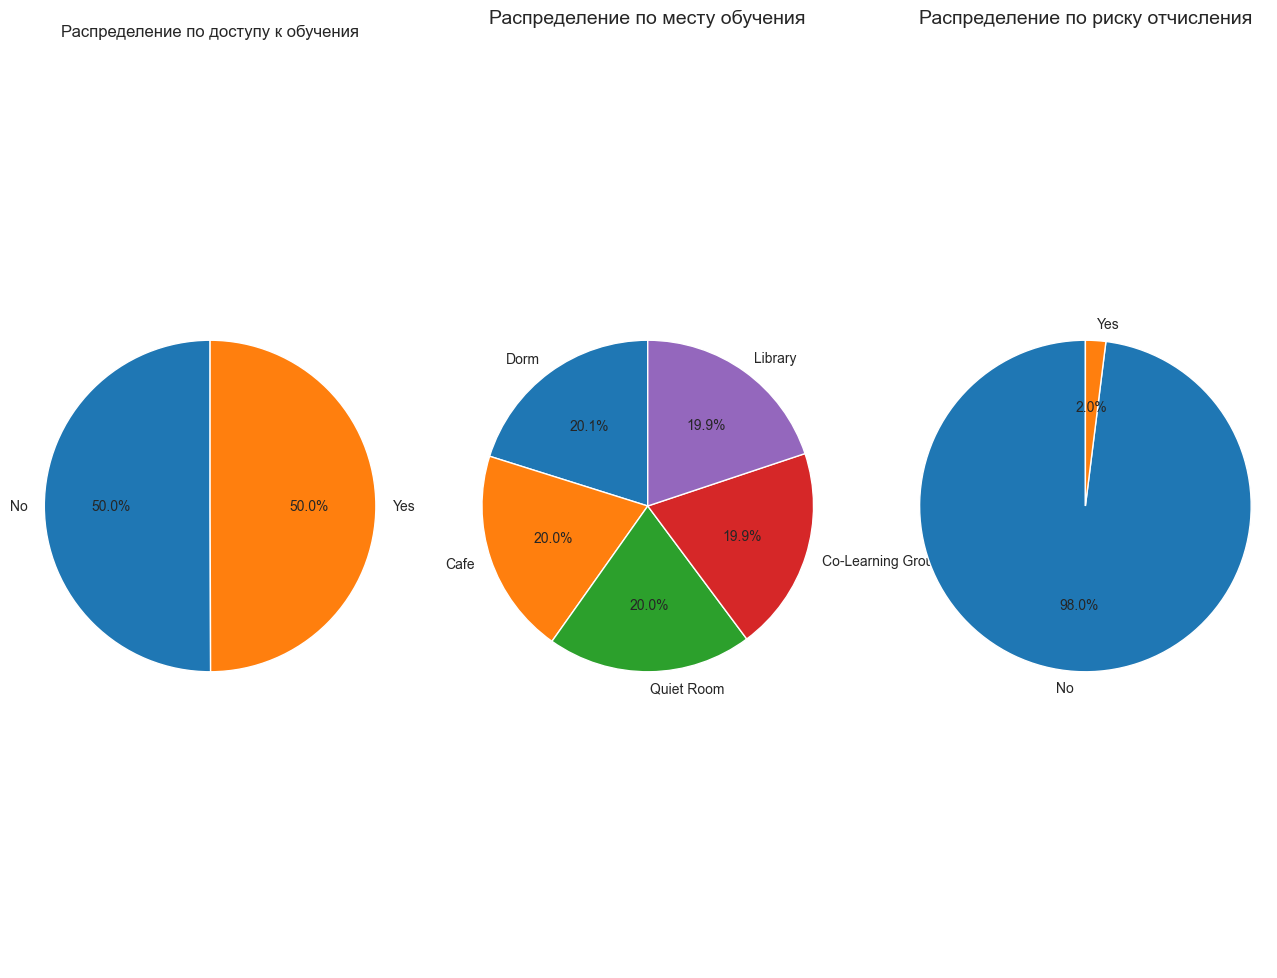

In [33]:
#Распределение по доступу к обучению
plt.figure(figsize=(16, 12))
plt.subplot(1, 3, 1)
counts = students['access_to_tutoring'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по доступу к обучения', fontsize=12)
plt.axis('equal')  # Для идеального круга

plt.subplot(1, 3, 2)
counts = students['study_environment'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по месту обучения', fontsize=14, pad=15)
plt.axis('equal')  # Для идеального круга

plt.subplot(1, 3, 3)
counts = students['dropout_risk'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по риску отчисления', fontsize=14, pad=15)
plt.axis('equal')  # Для идеального круга
plt.show()

### 1.6 Оставляем только ключевые признаки

In [35]:
students['access_to_tutoring_encoded'] = encoded_students['access_to_tutoring']
students['study_environment_encoded'] = encoded_students['study_environment']
students['dropout_risk_encoded'] = encoded_students['dropout_risk']

data=['previous_gpa', 'exam_score', 'motivation_level','study_hours_per_day',
      'exam_anxiety_score', 'screen_time', 'stress_level', 'sleep_hours',
      'exercise_frequency','access_to_tutoring_encoded', 'study_environment_encoded', 'dropout_risk_encoded']
for col in students:
    if col not in data: students.drop(col, axis=1, inplace=True)

## 2. Построение и оценка моделей

#### 2.1 Подготовка данных

In [41]:
# Разделение на признаки и целевую переменную
X = students[['exam_score','motivation_level','study_hours_per_day','exam_anxiety_score',
          'screen_time', 'stress_level', 'sleep_hours', 'exercise_frequency',
         'access_to_tutoring_encoded','study_environment_encoded','dropout_risk_encoded']]
y = students['previous_gpa']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
min_max_scaler = MinMaxScaler()
X1_train_scaled = min_max_scaler.fit_transform(X_train)
X1_test_scaled = min_max_scaler.transform(X_test)

#### 2.2 Линейная регрессия

In [96]:
lin_reg = LinearRegression()
lin_reg1 = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg1.fit(X1_train_scaled, y_train)

#Предсказания
y_pred_lin = lin_reg1.predict(X1_test_scaled)

#Оценка качества
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'MAE = {mae_lin}')
print(f"MSE = {mse_lin}")
print(f'R^2 = {r2_lin}')

MAE = 0.11996900445550267
MSE = 0.026550070321346795
R^2 = 0.8778533376779928


#### 2.3 kNN

In [74]:
#Подбор гиперпараметров
param_grid = {
    'n_neighbors': range(1, 11),  # k от 1 до 10
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

grid_search.fit(X1_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}


In [92]:
knn = KNeighborsRegressor(n_neighbors=10, metric ='euclidean', weights = 'distance')
knn.fit(X1_train_scaled, y_train)
y_pred_knn = knn.predict(X1_test_scaled)

mae_kNN = mean_absolute_error(y_test, y_pred_knn)
mse_kNN = mean_squared_error(y_test, y_pred_knn)
r2_kNN = r2_score(y_test, y_pred_knn)
print(f'MAE = {mae_kNN}')
print(f"MSE = {mse_kNN}")
print(f'R^2 = {r2_kNN}')

MAE = 0.13770174959616205
MSE = 0.0331005047452342
R^2 = 0.8477173082079044


#### 2.4 RandomForest

In [90]:
#Подбор гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],      # Количество деревьев
    'max_depth': [10, 20],         # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],     # Минимальное samples для разделения
    'min_samples_leaf': [1, 2, 4],       # Минимальное samples в листе
    'max_features': ['auto', 'sqrt']     # Количество признаков для разделения
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X1_train_scaled, y_train)
print("Лучшие параметры:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skl

Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [94]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_leaf = 2, n_jobs=-1)
rfr.fit(X1_train_scaled, y_train)
y_pred_rfr = rfr.predict(X1_test_scaled)

#Оценка качества
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f'MAE = {mae_rfr}')
print(f"MSE = {mse_rfr}")
print(f'R^2 = {r2_rfr}')

MAE = 0.1163445245998015
MSE = 0.025033270105707814
R^2 = 0.8848315521048163


## 3. Заключение

**Сравнение моделей**

In [98]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'kNN'],
    'MAE': [mae_lin, mae_rfr, mae_kNN],
    'MSE': [mse_lin, mse_rfr, mse_kNN],
    'R²': [r2_lin, r2_rfr, r2_kNN]
}

# Создание DataFrame
results_df = pd.DataFrame(results)
display(results_df)

,Model,MAE,MSE,R²
0,Linear Regression,0.119969,0.026550,0.877853
1,Random Forest,0.116345,0.025033,0.884832
2,kNN,0.137702,0.033101,0.847717


### Выводы по результатам сравнения моделей
1. Все модели оказались эффективными, судя по метрикам
2. Наилучшие значения метрик показала модель случайного леса, но разница с другими моделями незначительна
3. Время работы модели случайного леса и kNN значительно больше времени работы модели линейной регрессии, поэтому логично выбрать лучшей моделью именно линейную регрессию.

**Основные метрики:**
- MAE = 11%
- r^2 = 88%
- MSE = 2.5%
*****
Значение MAE=0.11 означает, что в среднем предсказанный средний балл студента отличается на +-0,11.
Значение r^2 = 0.88 означает, что модель хорошо описывает данные. 0,13 - неутчённые факторы
Значение MSE = 0.025 означает, что максимальное отклонение от среднего балла будет +-0,4
